### `Assignment`

In this assignment we'll ask you to plot multiple variables.   

You will use what you find in this assignment to answer the questions in the quiz that follows. It may be useful to keep this notebook side-by-side with this week's quiz on your screen.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
%matplotlib inline
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 100)

path = "data/cartwheel-data.csv"

In [2]:
# First, you must import the cartwheel data from the path given above
df = pd.read_csv(path)
df.head()

,ID,Age,Gender,GenderGroup,Glasses,GlassesGroup,Height,Wingspan,CWDistance,Complete,CompleteGroup,Score
0,1,56,F,1,Y,1,62.0,61.0,79,Y,1,7
1,2,26,F,1,Y,1,62.0,60.0,70,Y,1,8
2,3,33,F,1,Y,1,66.0,64.0,85,Y,1,7
3,4,39,F,1,N,0,64.0,63.0,87,Y,1,10
4,5,27,M,2,N,0,73.0,75.0,72,N,0,4


### `Scatter plots`

First, let's looks at two variables that we expect to have a strong relationship, `'Height'` and `'Wingspan'`.

            Height  Wingspan
Height    1.000000  0.954018
Wingspan  0.954018  1.000000




c:\Users\Panda\Documents\GitHub\understanding-and-visualizing-data-with-python\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Panda\Documents\GitHub\understanding-and-visualizing-data-with-python\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


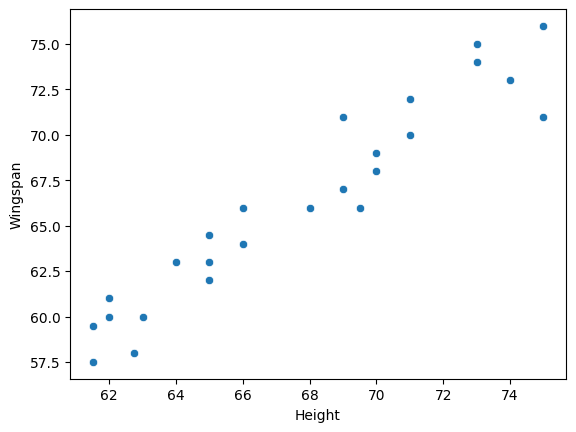

In [22]:
# Make a Seaborn scatter plot with x = height and y = wingspan using sns.scatterplot(x, y)

sns.scatterplot(x=df["Height"], y=df["Wingspan"])
print(df.loc[:, ["Height", "Wingspan"]].dropna().corr())
print("\n")

How would you describe the relationship between `'Height'` and `'Wingspan'`?   
Questions you can ask:
* Is it linear? `True`
* Are there outliers? `Yes`
* Are their ranges similar or different?  `Similar`

How else could you describe the relationship?


c:\Users\Panda\Documents\GitHub\understanding-and-visualizing-data-with-python\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Panda\Documents\GitHub\understanding-and-visualizing-data-with-python\.venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


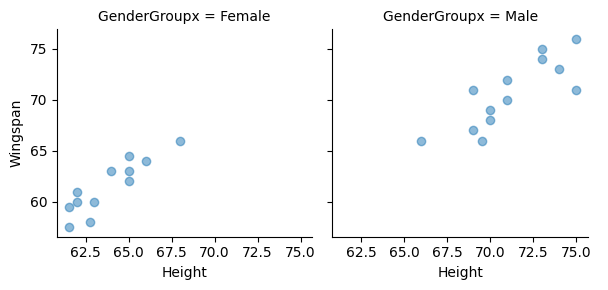

In [24]:
df["GenderGroupx"] = df.GenderGroup.replace({1: "Female", 2: "Male"}) 
sns.FacetGrid(df, col="GenderGroupx").map(plt.scatter, "Height", "Wingspan", alpha=0.5).add_legend();


How would you describe the relationship between 'Height' and 'Wingspan'?
Questions you can ask:

Is it linear?
Are there outliers?
Are their ranges similar or different?
How else could you describe the relationship?

Now let's look at two variables that we don't yet assume have a strong relationship, `'Wingspan'` and `'CWDistance'`

            Wingspan  CWDistance
Wingspan    1.000000    0.297662
CWDistance  0.297662    1.000000




c:\Users\Panda\Documents\GitHub\understanding-and-visualizing-data-with-python\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Panda\Documents\GitHub\understanding-and-visualizing-data-with-python\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


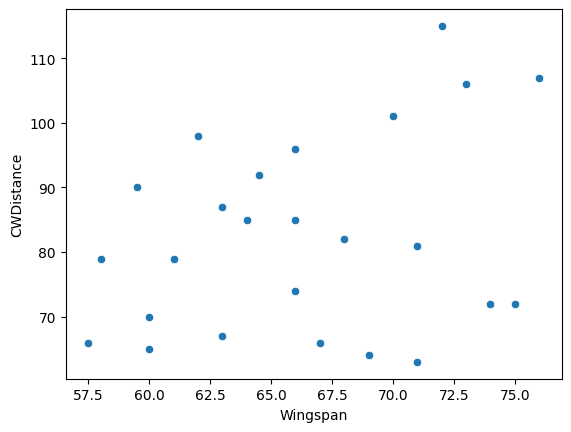

In [25]:
# Make a Seaborn scatter plot with x = wingspan and y = cartwheel distance
sns.scatterplot(x="Wingspan", y="CWDistance", data=df)
print(df.loc[:, ["Wingspan", "CWDistance"]].dropna().corr())
print("\n")


How would you describe the relationship between 'Wingspan' and 'CWDistance'?

Is it linear?
Are there outliers?
Are their ranges similar or different?
How else could you describe the relationship?

Let makes the same plot as above, but now include 'Gender' as the color scheme by including the argument
```python
    hue=df['Gender']
```
in the Seaborn function

c:\Users\Panda\Documents\GitHub\understanding-and-visualizing-data-with-python\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Panda\Documents\GitHub\understanding-and-visualizing-data-with-python\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Panda\Documents\GitHub\understanding-and-visualizing-data-with-python\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Panda\Documents\GitHub\understanding-and-vi

<Axes: xlabel='Wingspan', ylabel='CWDistance'>

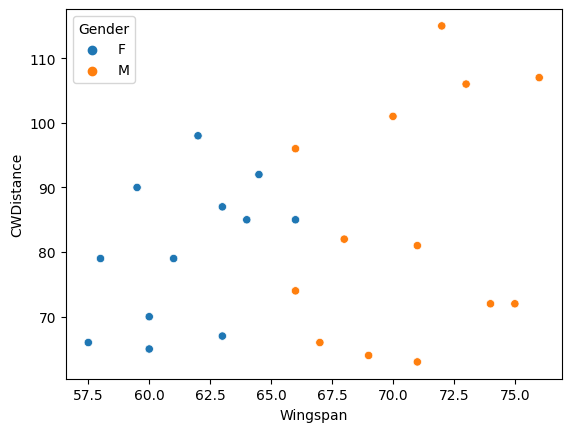

In [26]:
# Make a Seaborn scatter plot with x = wingspan and y = cartwheel distance, and hue = gender
sns.scatterplot(x="Wingspan", y="CWDistance", data=df, hue = "Gender" )


In [27]:
iqrCWDistance = np.subtract(*np.percentile(df.CWDistance, [75, 25]))
iqrCWDistance


22.0

In [28]:
iqrWingspan = np.subtract(*np.percentile(df.Wingspan, [75, 25]))
iqrWingspan

9.0

### `Barcharts`
Now lets plot barplots of 'Glasses'

In [14]:
df.head(3)

,ID,Age,Gender,GenderGroup,Glasses,GlassesGroup,Height,Wingspan,CWDistance,Complete,CompleteGroup,Score
0,1,56,F,1,Y,1,62.0,61.0,79,Y,1,7
1,2,26,F,1,Y,1,62.0,60.0,70,Y,1,8
2,3,33,F,1,Y,1,66.0,64.0,85,Y,1,7


c:\Users\Panda\Documents\GitHub\understanding-and-visualizing-data-with-python\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Panda\Documents\GitHub\understanding-and-visualizing-data-with-python\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Panda\Documents\GitHub\understanding-and-visualizing-data-with-python\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Glasses', ylabel='CWDistance'>

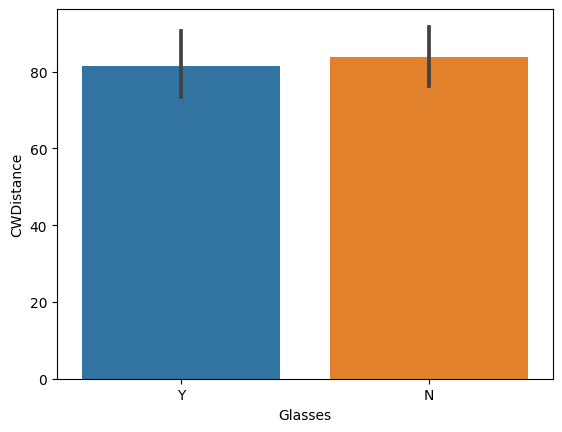

In [29]:
# Make a Seaborn barplot with x = glasses and y = cartwheel distance
sns.barplot(x="Glasses", y="CWDistance", data=df)


c:\Users\Panda\Documents\GitHub\understanding-and-visualizing-data-with-python\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Panda\Documents\GitHub\understanding-and-visualizing-data-with-python\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Panda\Documents\GitHub\understanding-and-visualizing-data-with-python\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Panda\Documents\GitHub\understanding-and-vi

<Axes: xlabel='Glasses', ylabel='CWDistance'>

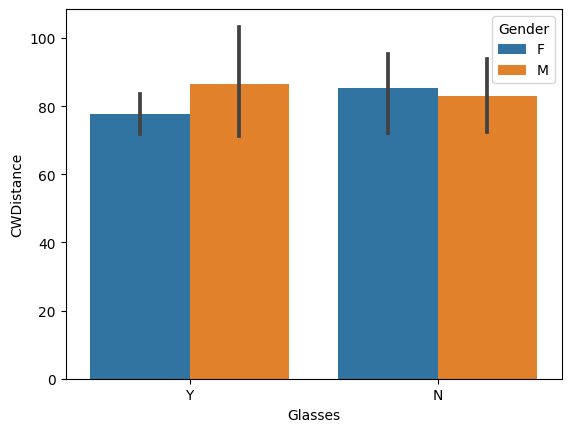

In [31]:
# What can you say about the relationship of 'Glasses' and 'CWDistance'?
# Make the same Seaborn boxplot as above, but include gender for the hue argument
sns.barplot(x="Glasses", y="CWDistance", data=df, hue = "Gender")

# How does this new plot change your interpretation about the relationship of 'Glasses' and 'CWDistance'?

In [32]:
df.describe()


,ID,Age,GenderGroup,GlassesGroup,Height,Wingspan,CWDistance,CompleteGroup,Score
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.00000,25.000000
mean,13.000000,28.240000,1.520000,0.560000,67.650000,66.260000,82.480000,0.76000,6.400000
std,7.359801,6.989754,0.509902,0.506623,4.431187,5.492647,15.058552,0.43589,2.533114
min,1.000000,22.000000,1.000000,0.000000,61.500000,57.500000,63.000000,0.00000,2.000000
25%,7.000000,24.000000,1.000000,0.000000,64.000000,62.000000,70.000000,1.00000,4.000000
50%,13.000000,26.000000,2.000000,1.000000,68.000000,66.000000,81.000000,1.00000,6.000000
75%,19.000000,29.000000,2.000000,1.000000,71.000000,71.000000,92.000000,1.00000,8.000000
max,25.000000,56.000000,2.000000,1.000000,75.000000,76.000000,115.000000,1.00000,10.000000
